# 学习任务

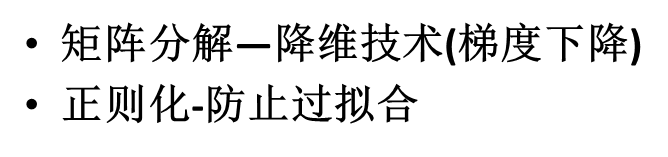

**附加:**梯度下降调参?

# 矩阵分解-降维技术(梯度下降)与正则化

## 矩阵分解知识概述

[基于矩阵分解的推荐算法，简单入门](https://www.cnblogs.com/bonelee/p/7126144.html)

[稀疏矩阵](https://baike.so.com/doc/5775258-5988034.html)

[推荐系统之矩阵分解及其Python代码实现](https://www.cnblogs.com/shenxiaolin/p/8637794.html)

## 正则化

正则化的主要目的就是提高模型的泛化能力，或降低模型的测试误差。

防止过拟合,可以从以下方面入手:
1. 模型参数：减少特征、权值衰减、Early stopping

2. 数据集：数据集扩增（源头取数、复制数据+随机噪声、重采样、分布估计）、验证数据（验证最小误差的迭代次数，常用交叉验证）

3. 增加罚项：正则化方法、Dropout（修改神经网络本身结构）

[深度学习中过拟合与防止过拟合的方法](https://blog.csdn.net/chen645096127/article/details/78990928)

[防止过拟合的方法](https://blog.csdn.net/ztf312/article/details/51084950)

[正则化方法](http://www.feiguyunai.com/index.php/2017/10/27/pythonai-regularization01/)

[L1与L2正则化](https://www.cnblogs.com/Peyton-Li/p/7607858.html)

**损失函数L1与L2正则化:**
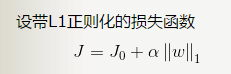
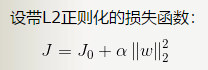
**神经网络DropOut正则化:**
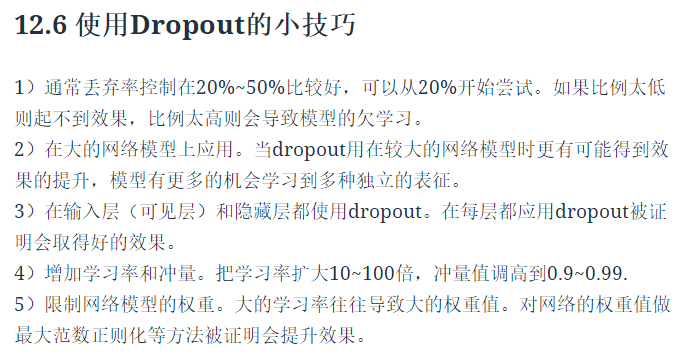

## 矩阵分解代码实现

矩阵的行数为: 5
矩阵的列数为: 4
[[0.79089883 0.85713809]
 [0.09523046 0.77741167]
 [0.66114776 0.70965279]
 [0.66734443 0.82130589]
 [0.9722396  0.23576203]] 

[[0.33324793 0.52528864]
 [0.59555435 0.7896527 ]
 [0.29307903 0.72664614]
 [0.11058002 0.33988479]]
原始的评分矩阵R为：
 [[5 3 0 1]
 [4 0 0 1]
 [1 1 0 5]
 [1 0 0 4]
 [0 1 5 4]]
经过MF算法填充0处评分值后的评分矩阵R_MF为：
 [[4.98535068 2.95986844 4.08268328 0.9997546 ]
 [3.97201253 2.36933606 3.44946702 0.99705768]
 [1.04647231 0.88436146 5.51726601 4.961929  ]
 [0.97596871 0.7885143  4.50308188 3.97250386]
 [1.57717691 1.14196253 4.93348068 4.02989663]]


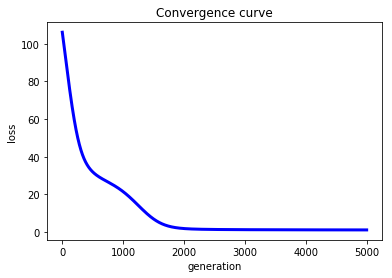

In [3]:
# encoding: utf-8
#矩阵分解在打分预估系统中得到了成熟的发展和应用
#引入相应的第三方库
import matplotlib.pyplot as plt
from math import pow
import numpy
#将生成的图嵌入到jupyter notebook中,用于显示
%matplotlib inline
  
#矩阵分解(MF)
def matrix_factorization(R,P,Q,K,steps=5000,alpha=0.0002,beta=0.02):#beta代表正则项的值
     Q=Q.T  # .T操作表示矩阵的转置
     result=[]
     for step in range(steps):#迭代次数
         for i in range(len(R)):
             for j in range(len(R[i])):
                 if R[i][j]>0:
                     eij=R[i][j]-numpy.dot(P[i,:],Q[:,j]) # .dot(P,Q) 表示矩阵相乘
                     #加入正则项的梯度下降
                     for k in range(K):
                         P[i][k]=P[i][k]+alpha*(2*eij*Q[k][j]-beta*P[i][k])
                         Q[k][j]=Q[k][j]+alpha*(2*eij*P[i][k]-beta*Q[k][j])
         eR=numpy.dot(P,Q)
         e=0
         for i in range(len(R)):
             for j in range(len(R[i])):
                 if R[i][j]>0:
                     e=e+pow(R[i][j]-numpy.dot(P[i,:],Q[:,j]),2)
                    #加入正则项的损失函数
                     for k in range(K):
                         e=e+(beta/2)*(pow(P[i][k],2)+pow(Q[k][j],2))
         result.append(e)
         if e<0.001:
             break
     return P,Q.T,result

#主函数 
if __name__ == '__main__':
     R=[
         [5,3,0,1],
         [4,0,0,1],
         [1,1,0,5],
         [1,0,0,4],
         [0,1,5,4]
     ]
     #转化列表为矩阵
     R=numpy.array(R)
     #获取矩阵列数
     N=len(R)
     #获取矩阵的每列元素
     M=len(R[0])
     print("矩阵的行数为:",N)
     print("矩阵的列数为:",M)
     '''
     P矩阵是N个用户对K个主题的关系，Q矩阵是K个主题跟M个物品的关系，至于K个主题
     具体是什么，在算法里面K是一个参数，需要调节的，通常10~100之间。
     '''
     K=2
 
     P=numpy.random.rand(N,K) #随机生成一个 N行 K列的矩阵
     Q=numpy.random.rand(M,K) #随机生成一个 M行 K列的矩阵
     
     print(P,"\n")
     print(Q)
      
     nP,nQ,result=matrix_factorization(R,P,Q,K)
     print("原始的评分矩阵R为：\n",R)
     R_MF=numpy.dot(nP,nQ.T)
     print("经过MF算法填充0处评分值后的评分矩阵R_MF为：\n",R_MF)
 
 #损失函数的收敛曲线图
     n=len(result)
     x=range(n)
     plt.plot(x,result,color='b',linewidth=3)
     plt.title("Convergence curve")
     plt.xlabel("generation")
     plt.ylabel("loss")
     plt.show()

# 梯度下降与矩阵分解公式推导

## 梯度下降(批量)推导 

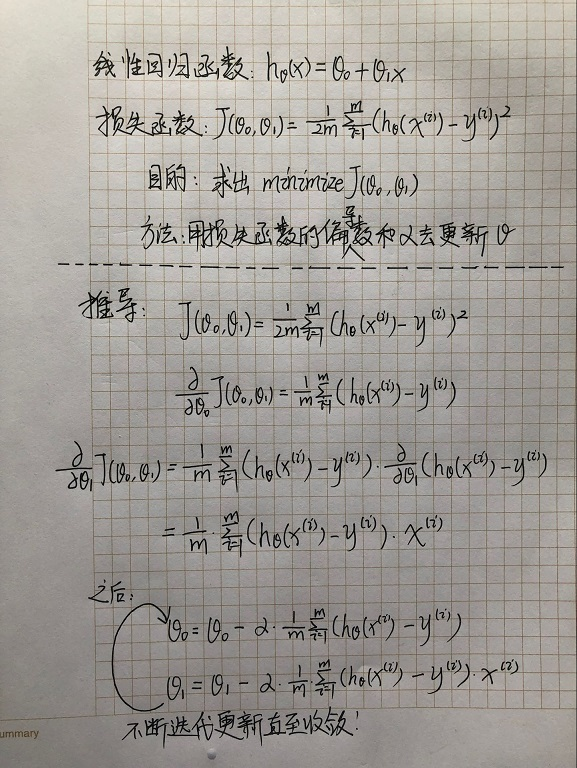

## 矩阵分解公式(未正则化)推导

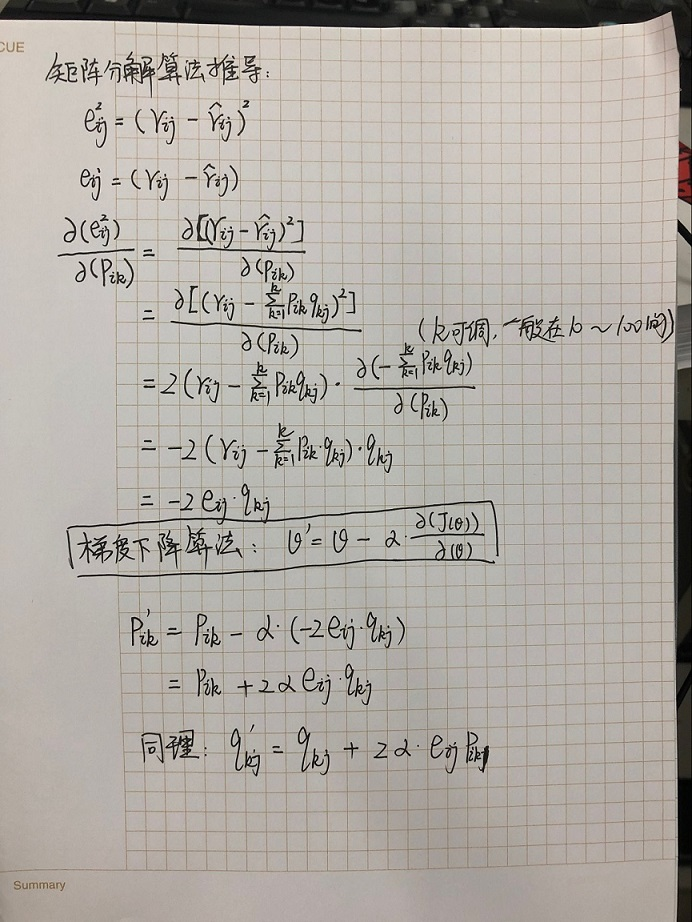

*当我们加入正则化后：*

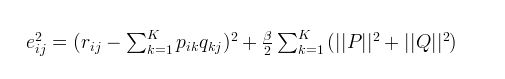
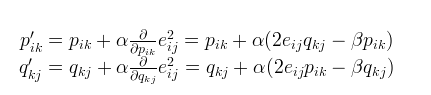